# Theory

## Mathematical definition

Given the following parameters
- $N \in \mathbb{N} \dots$ size parameter (number of components)
- $\lambda \in \mathbb{R}_+ \dots$ rate paremeter (exponential distribution of delays)
- $\alpha \in \left[0, \tfrac{1}{2}\right]\dots$ window size parameter (activity window of response function)
- $K \in [0, 1] \dots$ coupling constant (interaction probability of components)

we construct a network on $N$ vertices as follows:
1. Each vertex $i$ is associated with a _position_ $\theta_i \sim \operatorname{WrapExp}(\lambda)$ drawn from a wrapped exponential distribution with rate parameter $\lambda$.
2. Now the edge probability for the two vertices $i$ and $j$ is given by the "positive part" of a linear function of the distance of $\theta_i$ and $\theta_j$, i.e.

$$p_{ij} 
= K \cdot \left| 1- \frac{d\left(\theta_i, \theta_j\right)}{2\pi\alpha} \right|_+ \, ,$$

where $d$ is the "circular distance" of two points, i.e. $d(x,y) = \min \big\{{|x-y|, 2\pi-|x-y|} \big\}$ and $|x|_+$ is the positive part, i.e. $|x|_+ = x$ for $x \geq 0$ and $|x|_+ = 0$ otherwise.

**Note:** The positions $\theta_i$ completely determine the probability matrix $P = (p_{ij})$ which (for $\lambda < \infty$) describes an _inhomogenious_ random graph model.

Assuming the response functions are elements of $r_i, r_j \in L^2([0, 2\pi])$ we can calculate the "cosine similarity" as
$$s_{i,j} = \frac{\langle r_i, r_j \rangle}{\|r_i \| \|r_j \|} = \left| 1 - \frac{d(\theta_i, \theta_j)}{2\pi \alpha} \right|_{+} \, ,$$
where $| x |_+$ is the _positive part_ of $x$, i.e. $|x|_+ = x$ for $x \geq 0$ and $|x|_+ = 0$ otherwise.

Since $s_{ij} \in [0,1]$ we can take $S = (s_{ij})$ already to define the random network. However, these networks tend to be densly connected and hence we introduce an additional parameter $K \in [0,1]$ to have more control over the overall connectivity by linearly scaling the similarities $P = K\cdot S$. The coupling constant $K$ is corresponds to the probability with which two components are interacting when they have exactly the same response function.

## Alternative parametrization

### Delay as normalized distribution parameter

[WRONG DIRECTION]
We will introduce a _delay parameter_ $\beta$ to parametrize the exponential distribution with a bounded parameter $\beta \in [0,1]$ such that $\beta = 0$ results in the delta distribution at the origin ($\lambda \rightarrow 0$), wheras $\beta = 1$ results in the uniform distribution $\lambda \rightarrow \infty$. To that end define the transformations
- $\beta = 1 - \frac{2}{\pi} \arctan(\lambda)$.
- $\lambda = \tan \left(\frac{\pi}{2}(1-\beta) \right)$

The parameter $\beta$ has the interpretation of a _response parameter_ of the internal states to an external signal. $\beta = 0$ means an immediate response of all internal states to the signal, whereas $\beta = 1$ results in no influence of internal states to the external stimulus. 

**Note 1:** For $\beta = 0$ the model "looses its stochasticity" on the node level, forcing each node to behave the same. This system is _homogeneous_ and we recover the _Erdös-Renyi model_.

**Note 2:** For $\beta = 1$ the components are uniformly sampled on the circle and we obtain a _generalized geometric random graph_ with connection function specified by $p$. However, for $K \rightarrow \infty$ we recover the "classical" geometric random graph on the circle with a "hard cutoff" at $2\pi \alpha$.

### Network density as normalized coupling strength

$$\rho = K \cdot \frac{ 2\sinh(2A + B)\sinh(A) \sinh(A+B)}
{A\big(\cosh(2A+2B)-1\big)} \,$$
for $K \leq 1$ and $A = a\pi\lambda$ and $B = \pi\lambda - 2A$.

For $a = \frac{1}{2}$ this reduces to
$$\rho = K \cdot \left(1 -  \frac{\tanh (\pi\lambda / 2)}{\pi \lambda} \right)$$

- $K = $ [SOMETHING]

### Discontinous jump at $\beta = 0$ (lack of phase transition)

The network becomes "ringy" with probability
$$p_{\text{ring}} = 1 - \left( 1 - \frac{K}{\alpha \lambda'} \cdot \frac{1 - e^{\alpha \lambda'} + \alpha\lambda'}{1 - e^{\lambda'}} \right)^N \,$$
with $\lambda' = 2\pi\lambda$.

A quick calculation shows that
$$T(\lambda') = K \left(\frac{1}{\alpha x} \cdot \frac{1 - e^{\alpha x} + \alpha \lambda'}{1 - e^{\lambda'}} \right)
\xrightarrow{\lambda' \rightarrow 0} \frac{K\alpha}{2} > 0 \, $$

and hence, for any constant $K$ and $\alpha$ the probability of the network forming a ring approaches $1$ as $N \rightarrow \infty$ and $\beta \rightarrow 1$.

Conversely, we have

$$T(x) \xrightarrow{x \rightarrow \infty} 0 \, $$
and hence the nework does not form a ring for $\beta \rightarrow 0$. 

The term $T(x)$ is positive for $x < \infty$ and hence the network will eventually become circular.

# Praxis

In [1]:
import time
import numpy as np
import pandas as pd
import ringity as rng
import networkx as nx
import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.spatial.distance import pdist, squareform
from ringity.classes.network_model import NetworkBuilder

## Distribution

In [2]:
# Pipeline

N = 2**14
beta = 0.523

rate  = np.tan(np.pi * (1-beta) / 2)
delay = 1 - 2/np.pi * np.arctan(rate)

network_builder = NetworkBuilder(random_state = 1234)
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)

In [3]:
assert np.isclose(delay, beta)

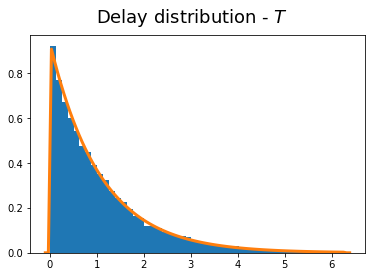

In [4]:
x = np.linspace(-0.1,2*np.pi+0.1,100)

plt.hist(network_builder.positions, density=True, bins=50);
plt.plot(x, rng.pdf_delay(x, rate, 'rate') , linewidth=3)

plt.suptitle("Delay distribution - $T$", fontsize=18);

In [5]:
mu1 = np.mean(network_builder._positions)
mu2 = quad(lambda x : x*rng.pdf_delay(x, rate, 'rate'), 0, 2*np.pi)[0]

print(mu1)
print(mu2)

1.060866553071504
1.056757304047466


In [6]:
rv = ss.truncexpon(b = 2*np.pi*rate, scale = 1/rate)
rv.mean()

1.0567573040474658

In [7]:
ss.ks_1samp(network_builder._positions, rv.cdf)

KstestResult(statistic=0.005849190884225863, pvalue=0.6271770410864851)

## Distances and Similarity

In [8]:
# Pipeline

N = 2**13
beta = np.random.uniform()
alpha = np.random.uniform(0, 0.5)

rate  = np.tan(np.pi * (1-beta) / 2)
delay = 2/np.pi * np.arctan(rate)

network_builder = NetworkBuilder(random_state = 1234)
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)
network_builder.calculate_distances(metric = 'euclidean', circular = True)
network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')

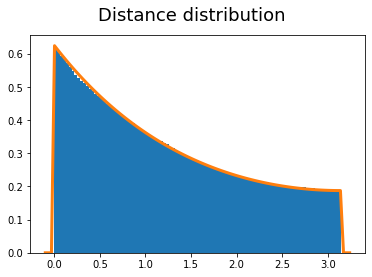

In [9]:
x = np.linspace(-0.1, np.pi+0.1, 100)

plt.hist(network_builder._distances, density=True, bins=100);
plt.plot(x, rng.pdf_circular_distance(x, rate, 'rate') , linewidth=3)

plt.suptitle("Distance distribution", fontsize=18);

In [10]:
mu1 = np.mean(network_builder._distances)
mu2 = quad(lambda x : x*rng.pdf_circular_distance(x, rate, 'rate'), 0, 2*np.pi)[0]

print(mu1)
print(mu2)

1.235587758708512
1.2305660883036873


In [11]:
disc_part = 2*(network_builder._similarities!=0).sum() / (N*(N-1))

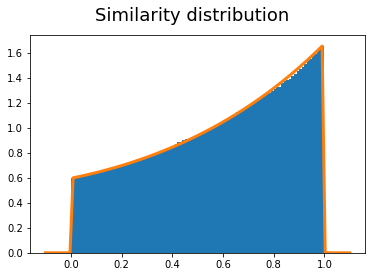

In [12]:
x = np.linspace(-0.1, 1.1, 100)

plt.hist(network_builder._similarities[network_builder._similarities!=0], density=True, bins=100);
plt.plot(x, rng.pdf_similarity(x, parameter = rate, a = alpha, parameter_type = 'rate')/disc_part , linewidth=3)

plt.suptitle("Similarity distribution", fontsize=18);

In [13]:
mu1 = np.mean(network_builder._similarities)
mu2 = quad(lambda x : x*rng.pdf_similarity(x, parameter = rate, a=alpha, parameter_type='rate'), 
           0, 2*np.pi)[0]

print(mu1)
print(mu2)

0.4669992547779308
0.4690439662979971


In [14]:
rng.classes.network_model.mean_similarity(a=alpha, rate = rate)

0.46904396600798537

In [15]:
def mean_similarity(rate, a):
    """Calculate expected mean similarity (equivalently maximal expected density). 
    
    This function assumies a (wrapped) exponential function and a cosine similarity 
    of box functions.
    """
    palph = a*2
    plamb = np.pi * rate
    
    # Alternatively:
    numerator = 2*(np.sinh(plamb*(1-a)) * np.sinh(plamb*a))
#    numerator = (np.cosh(plamb) - np.cosh(plamb*(1 - palph)))
    denominator = (palph*plamb * np.sinh(plamb))
    
    return 1 - numerator / denominator 

In [16]:
mean_similarity(a=alpha, rate = rate)

0.46904396600798537

## Probability

In [19]:
N = 2**9
beta = np.random.uniform()
alpha = np.random.uniform(0, 0.5)

rate  = np.tan(np.pi * (1-beta) / 2)

max_rho = rng.classes.network_model.mean_similarity(a=alpha, rate = rate)
rho = np.random.uniform(0, max_rho)

K = rng.classes.network_model.density_to_interaction_strength(rho, a=alpha, rate=rate)
density = rng.classes.network_model.mean_similarity(a=alpha, rate = rate)*K

network_builder = NetworkBuilder()
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)
network_builder.calculate_distances(metric = 'euclidean', circular = True)
network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')
network_builder.calculate_probabilities(a = K, b = 0)
network_builder.instantiate_network()

In [20]:
assert np.isclose(rho, density)

In [21]:
disc_part = 2*(network_builder._probabilities!=0).sum() / (N*(N-1))

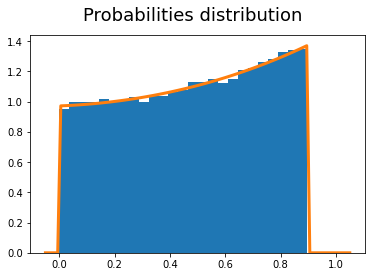

In [22]:
x = np.linspace(-0.05, 1.05, 100)

plt.hist(network_builder._probabilities[network_builder._probabilities != 0], density=True, bins=25);
plt.plot(x, rng.pdf_probability(x, 
                                rho = rho,
                                parameter = rate, 
                                a = alpha, 
                                parameter_type = 'rate')/disc_part , linewidth=3)

plt.suptitle("Probabilities distribution", fontsize=18);

In [23]:
mu1 = np.mean(network_builder._probabilities)
mu2 = quad(lambda x : x*rng.pdf_probability(x, parameter = rate, a=alpha, rho=rho, parameter_type='rate'), 
           0, 2*np.pi)[0]

print(mu1)
print(mu2)

0.43861443362162944
0.4371792443072591


## Parameter scouting

In [91]:
N = 2**9
beta = 0.7
alpha = 0.05
K = 1
# rho = 0.025

rate  = np.tan(np.pi * (1-beta) / 2)
delay = 2/np.pi * np.arctan(rate)
# K = rng.classes.network_model.slope(rho, rate, alpha)


network_builder = NetworkBuilder()
network_builder.set_distribution('exponential', scale = 1/rate)
network_builder.instantiate_positions(N)
network_builder.calculate_distances(metric = 'euclidean', circular = True)
network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')
network_builder.calculate_probabilities(a = K, b = 0)
network_builder.instantiate_network()

In [92]:
G = nx.from_numpy_array(squareform(network_builder.network))

pos = list(zip(np.cos(network_builder.positions), 
               np.sin(network_builder.positions)))

0.26413220931910275


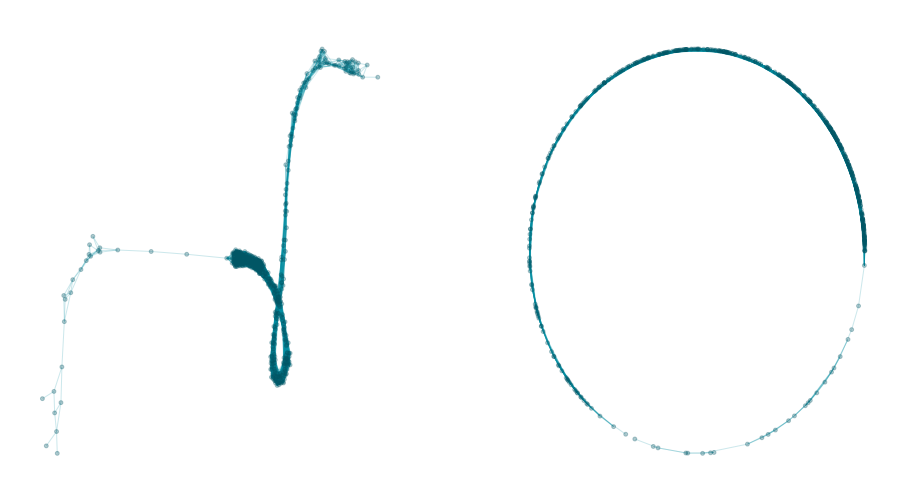

In [93]:
print(rng.diagram(G)[:50].ring_score)

fig, axes = plt.subplots(1, 2, figsize = (16,9))

rng.plot_nx(G, ax=axes[0])
rng.plot_nx(G, ax=axes[1], pos = pos)

In [ ]:
pos = nx.spring_layout(G)

In [104]:
alphas = np.linspace(0.5/4, 0.5, 4)
Ks = np.linspace(1/4, 1, 4)

In [105]:
N = 2**9
beta = 0.7

rate  = np.tan(np.pi * (1-beta) / 2)

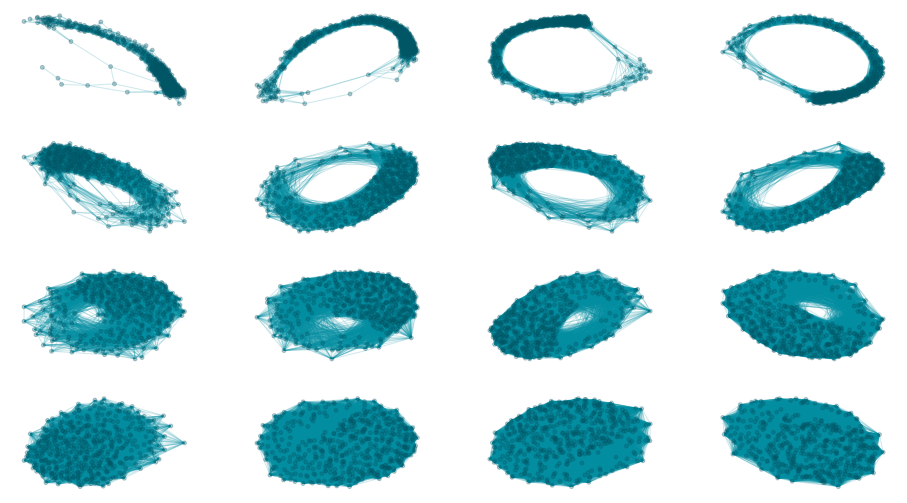

In [106]:
fig, axes = plt.subplots(4, 4, figsize = (16,9))

for i,j in product(range(4), repeat = 2):
    network_builder = NetworkBuilder()
    network_builder.set_distribution('exponential', scale = 1/rate)
    network_builder.instantiate_positions(N)
    network_builder.calculate_distances(metric = 'euclidean', circular = True)
    network_builder.calculate_similarities(alpha = alphas[i], sim_func = 'box_cosine')
    network_builder.calculate_probabilities(a = Ks[j], b = 0)
    network_builder.instantiate_network()
    
    G = nx.from_numpy_array(squareform(network_builder.network))

    pos = list(zip(np.cos(network_builder.positions), 
                   np.sin(network_builder.positions)))
    
    rng.plot_nx(G, ax=axes[i,j])

In [107]:
alphas

array([0.125, 0.25 , 0.375, 0.5  ])

In [109]:
Ks

array([0.25, 0.5 , 0.75, 1.  ])

In [110]:
beta

0.7

## Phase transition

In [ ]:
# Pipeline

N = 2**8
alpha = 0.5
K = 0.1

n_ensembl = 2**6
ring_scores = dict()
beta_arr = np.linspace(0.01, 0.99, 2**5)

t1 = time.time()
for nr, beta in enumerate(beta_arr, 1):
    t2 = time.time()
    percentage_finished = nr/len(beta_arr)
    time_passed = t2-t1
    eta = time_passed*(1/percentage_finished - 1)
    print(f"{100*percentage_finished:.2f}% - time passed: {time_passed:.2f}sec - eta: {eta:.2f}", end = '\r')
    
    ring_scores[beta] = list()
    
    for _ in range(n_ensembl):
        rate  = np.tan(np.pi * (1-beta) / 2)

        network_builder = NetworkBuilder()
        network_builder.set_distribution('exponential', scale = 1/rate)
        network_builder.instantiate_positions(N)
        network_builder.calculate_distances(metric = 'euclidean', circular = True)
        network_builder.calculate_similarities(alpha = alpha, sim_func = 'box_cosine')
        network_builder.calculate_probabilities(a = K, b = 0)
        network_builder.instantiate_network()

        G = nx.from_numpy_array(squareform(network_builder.network))
        S = nx.subgraph(G, max(nx.connected_components(G), key=len))
        if len(S) < N:
            print('o')
            print()
        
        ring_scores[beta].append(rng.diagram(S)[:50].ring_score)
        #ring_scores[beta].append(nx.diameter(S))

In [51]:
ring_score_df = pd.DataFrame(ring_scores)

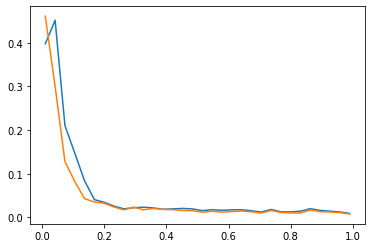

In [52]:
# N = 2**10
# K = 0.1
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

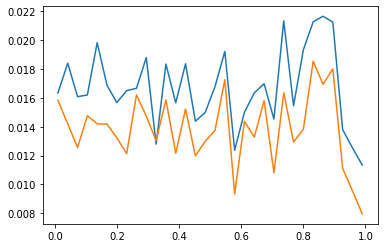

In [41]:
# N = 2**9
# K = 0.1
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

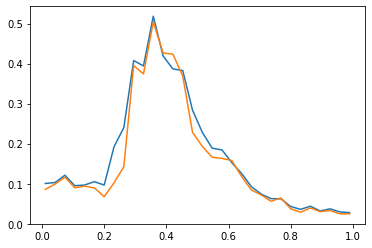

In [31]:
# N = 2**9
# K = 0.2
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

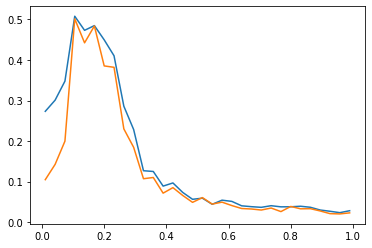

In [27]:
# N = 2**8
# K = 0.2
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

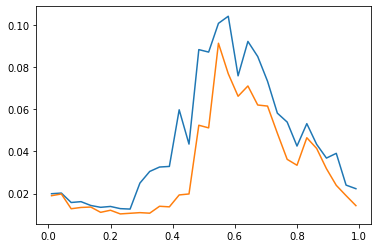

In [45]:
# N = 2**8
# K = 0.1

plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

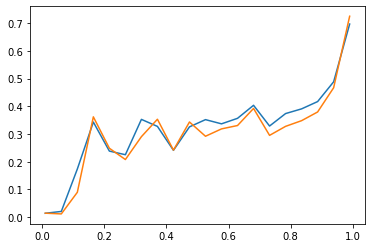

In [34]:
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

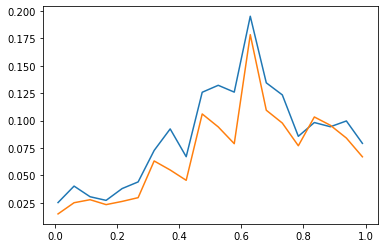

In [25]:
plt.plot(ring_score_df.columns, ring_score_df.mean())
plt.plot(ring_score_df.columns, ring_score_df.median())

In [10]:
nx.density(G)

0.0505442759295499

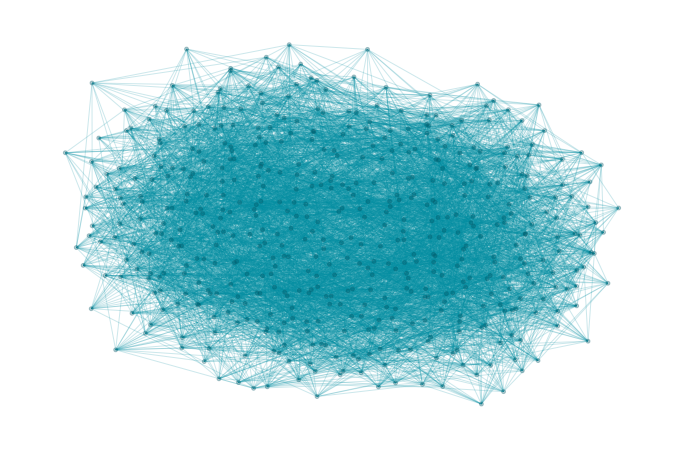

In [9]:
rng.plot_nx(G)

---

# Theory expansion

## As a statistical interaction network model

Fixed parameters of the model are:
 - an _internal state spce / response space / local microstates_, $\sigma_{\mathit int} = \{ 0, 1\}$
 - an _external state space_, $\sigma_{\mathit ext} = [ 0, 2\pi]$
 - position distribution of elements / components / statistical units, $X_i \sim WExp(\lambda)$
 - a connection function, 
$p:\sigma_{\mathit ext} \times \sigma_{\mathit ext} \rightarrow [0,1]: (\theta_i, \theta_j) \mapsto \min \Big\{1, k - \frac{k}{2\pi a}d(\theta_i, \theta_j) \Big\}$,

where $d(.,.)$ is the "_periodic distance_", i.e. $d(\theta_i, \theta_j) = \min {\Big\{ \big|\theta_i-\theta_j\big|, 2\pi-\big|\theta_i-\theta_j\big|} \Big\}$

## As an Ising model with a "_random lattice_"

---
**Pending Thoughts**

I think the Ising model makes more sense for the "line graph", i.e. where the edges represent components and nodes define interactions.

---

Given the three parameters $N$, $a$ and $\beta$ we can construct a "_random lattice_" $\Lambda$ via:
$$\langle ij \rangle \Leftrightarrow d(\Theta_i, \Theta_j) < 2\pi a \, , \text{where } \Theta_k \sim \mathit WExp (\lambda)$$

## As a Generalized random geometric graph (RGG)

The connection fucntion is taken from the "_Quasi unit disk model_" via
$$H(d) =
    \begin{cases}
      1, & \text{if}\ d \leq d_- \\
      \frac{d_+ - d}{d_+ - d_-}, & \text{if}\ d_- \leq d \leq d_+ \\
      0, & \text{if}\ d \geq d_+
    \end{cases} \, ,$$ 
    
where $d_- = 2\pi a (1-1/k)$ and $d_+ = 2$. 

The small $d$ expansion is the constant $1$ (similar to a random geometric graph model with a "hard" cutoff).

## References
- Dettmann, Carl P., and Orestis Georgiou. "Random geometric graphs with general connection functions." Physical Review E 93.3 (2016): 032313.
- Kuhn, F., R. Wattenhofer, and A. Zollinger. "Proceedings of the 2003 Joint Workshop on Foundations of Mobile Computing." (2003): 69-78.
- Gao, Deyun, et al. "Hop-distance relationship analysis with quasi-UDG model for node localization in wireless sensor networks." EURASIP Journal on Wireless Communications and Networking 2011.1 (2011): 1-11